# matplotlibの使い方

In [1]:
import random
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
print(f"matplotlib: {mpl.__version__}")

/var/folders/tv/9pv2t92113g5hw2kp4g351_00000gn/T/ipykernel_2594/3063809416.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


matplotlib: 3.8.2


# カラーマップ

- 利用可能なカラーマップ名は``matplotlib.colormaps``で確認
- カラーマップ名は170種類

In [10]:
#mpl.colormaps()
#len(mpl.colormaps()) # 170

# キャンバスを作成する

- ``pyplot.figure``
- ``pyplot.subplots``
- ``pyplot.subplot_mosaic``

In [22]:
# help(plt)
# help(plt.figure)
# help(plt.subplots)
# help(plt.subplot_mosaic)

In [27]:
# plt.subplots(nrows=3, ncols=4 ,clear=True, figsize=(16, 12))

適当なサンプルデータを準備する

- 乱数（`random.gauss()`）を使って、ガウス分布に従う`(x, y, z)`の組み合わせを作成する

In [89]:
r = [ [random.gauss(), random.uniform(4, 8), random.randint(0, 10)] for i in range(1000)]
data = pd.DataFrame(r, columns=["x", "y", "z"])
#data

# プロットを作成する

- ``pandas.DataFrame.plot()``でプロットを作成できます
- デフォルトは折れ線グラフです

<Axes: >

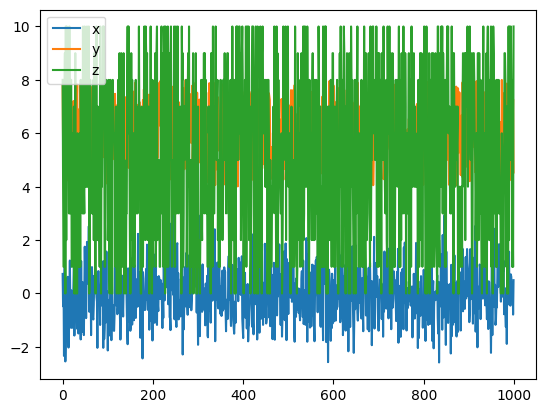

In [90]:
data.plot()

- ``kind``オプションを使ってグラフの種類を変更できます
- ``kind="hist"``でヒストグラムを作成できます

<Axes: ylabel='Frequency'>

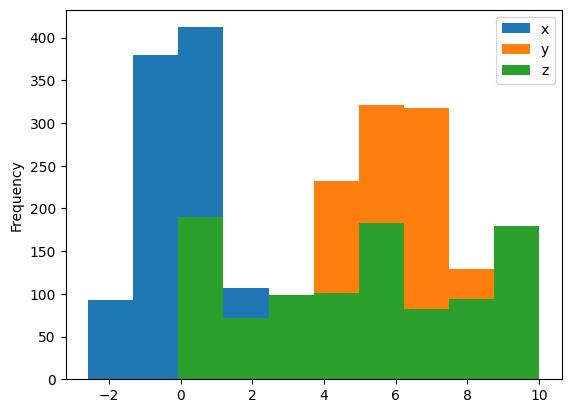

In [91]:
data.plot(kind="hist")

- ``kind="scatter"``で散布図を作成できます
- X軸とY軸を指定する必要があります

<Axes: xlabel='y', ylabel='z'>

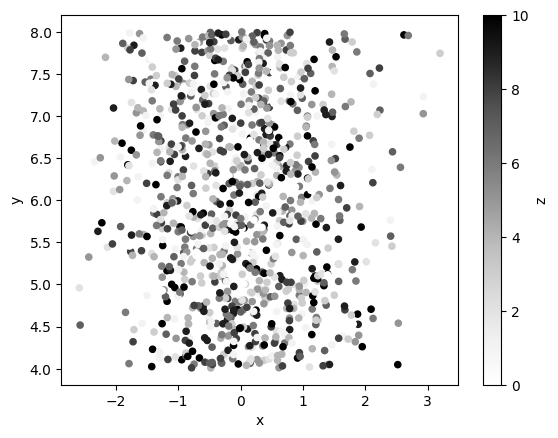

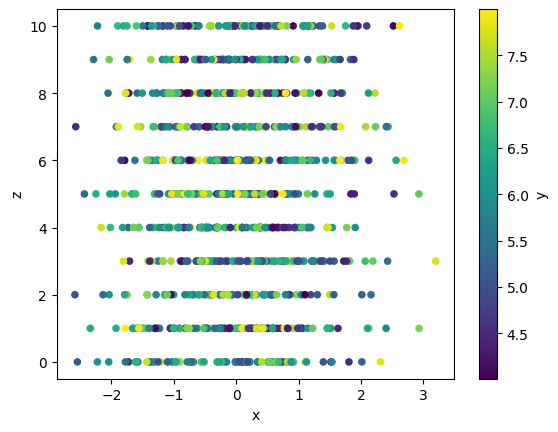

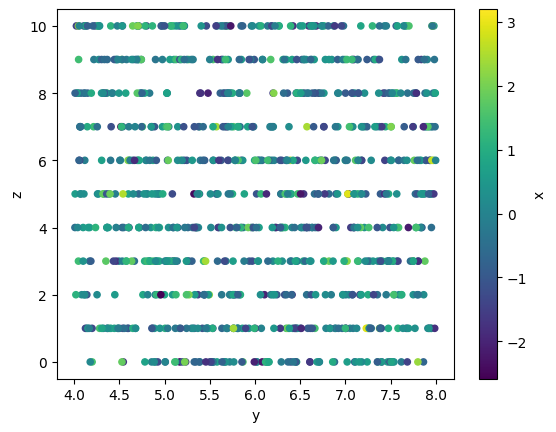

In [99]:
data.plot(kind="scatter", x="x", y="y", c="z")
data.plot(kind="scatter", x="x", y="z", c="y")
data.plot(kind="scatter", x="y", y="z", c="x")

<Axes: >

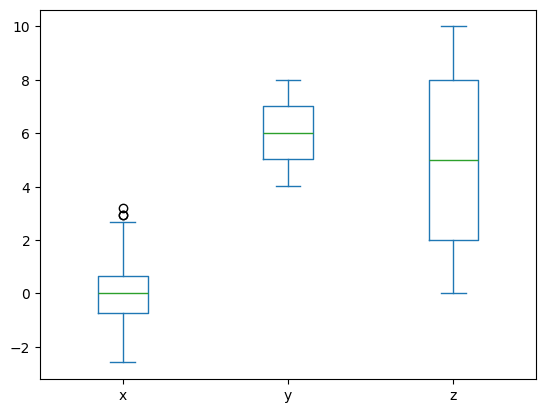

In [93]:
data.plot(kind="box")

In [83]:
#data.plot(kind="bar")
#data.plot(kind="barh")

<Axes: xlabel='y', ylabel='z'>

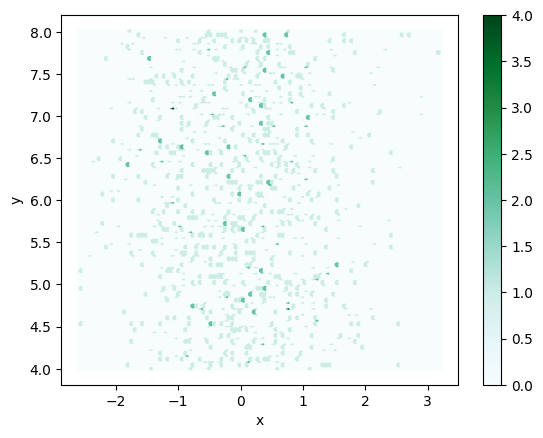

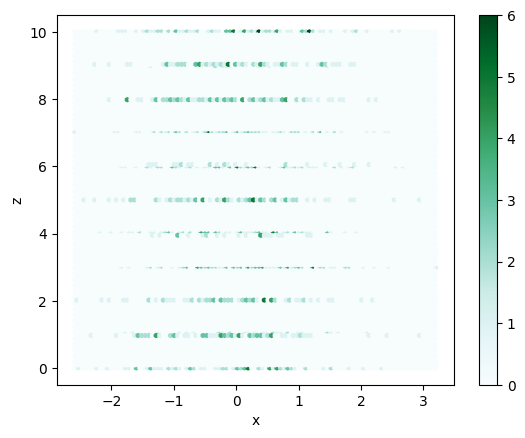

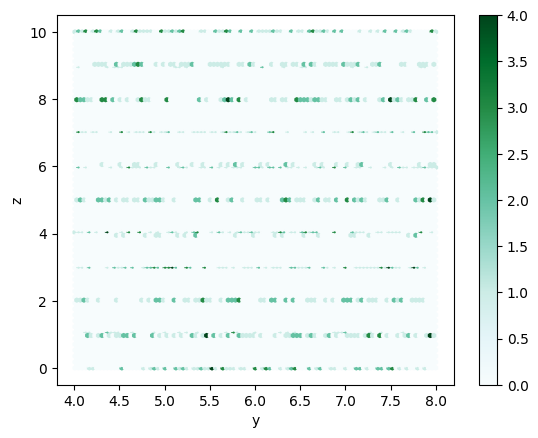

In [101]:
data.plot(kind="hexbin", x="x", y="y")
data.plot(kind="hexbin", x="x", y="z")
data.plot(kind="hexbin", x="y", y="z")

data.plot(kind="bar")

# ヒストグラムを作成する

- ``pandas.DataFrame.plot.hist()``でヒストグラムを作成できます
- 数値のすべてのカラムがプロットされます

<Axes: ylabel='Frequency'>

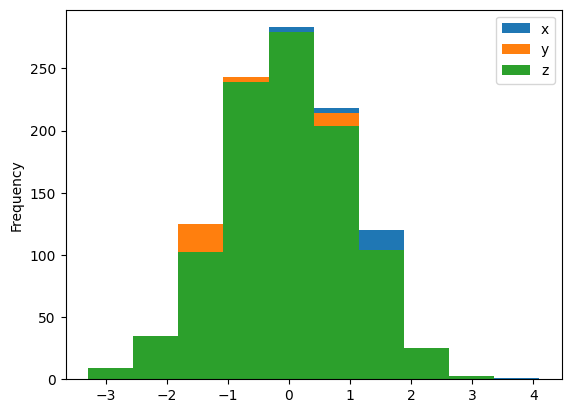

In [62]:
data.plot.hist()

array([<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>], dtype=object)

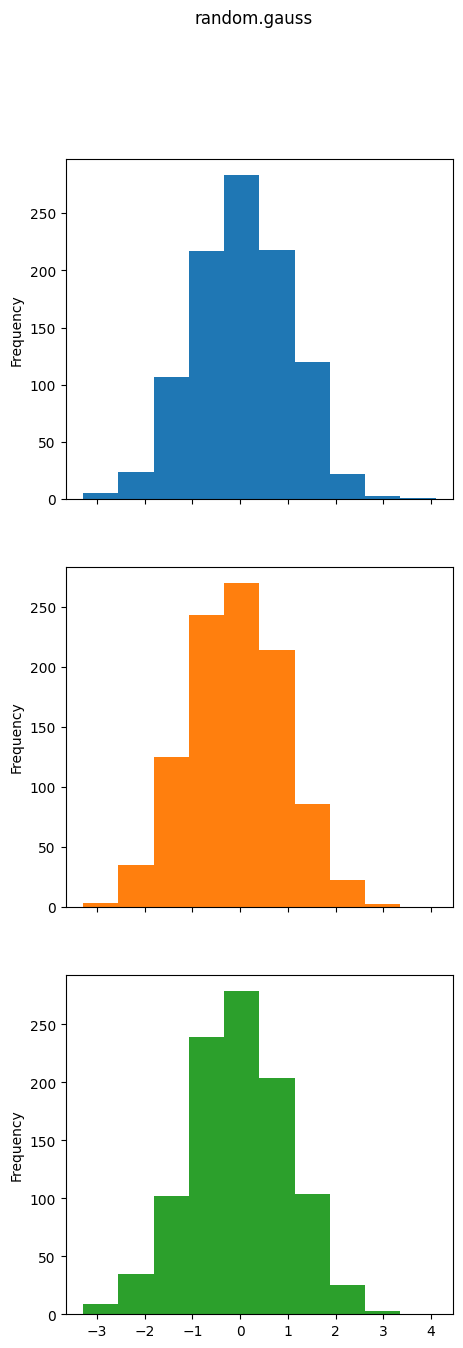

In [69]:
data.plot.hist(subplots=True, legend=False, title="random.gauss", figsize=(5, 15))

# 散布図を作成する

- ``pandas.DataFrame.plot.scatter(x, y, s=None, c=None, **kwargs)``を使って散布図を作成する
- ``x`` : X軸に使用するカラム名（or カラム番号）
- ``y`` : Y軸に使用するカラム名（or カラム番号）
- ``s`` : 点の大きさ
- ``c`` : 点の色
- ``**kwargs`` : ``pandas.DataFrame.plot``で使えるオプション
  - ``title`` : 図のタイトル
  - ``xlabel`` : X軸のタイトル
  - ``ylabel`` : Y軸のタイトル
  - ``figsize`` : 図オブジェクトのサイズ（inch）
  - ``fontsize`` : フォントの大きさ
  - ``colormap`` : カラーマップ名（``matplotlib.colormaps``）
  - ``legend`` : 凡例表示の有効／無効
  - ``colorbar`` : カラーバー表示の有効／無効
- 返り値は``matplotlib.axes.Axes``オブジェクト

matplotlib.axes._axes.Axes

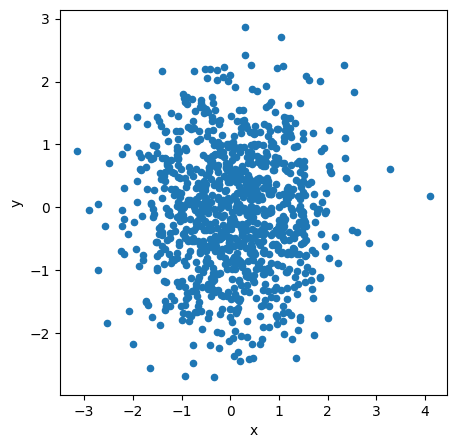

In [61]:
ax = data.plot.scatter(x="x", y="y", figsize=(5, 5))
type(ax)

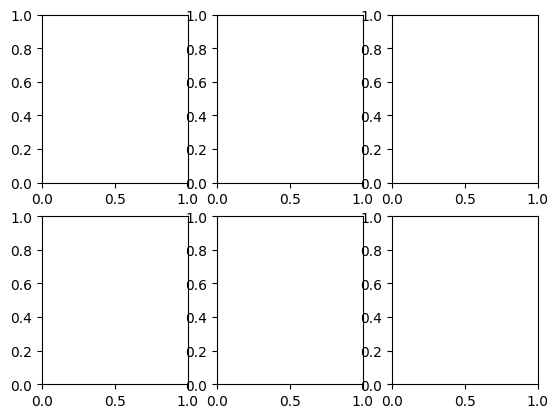

In [31]:
fig, axes = plt.subplots(nrows=2, ncols=3)

In [32]:
fig.number

1

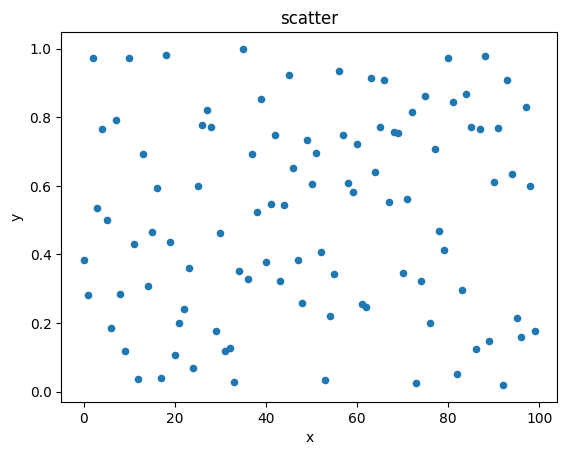

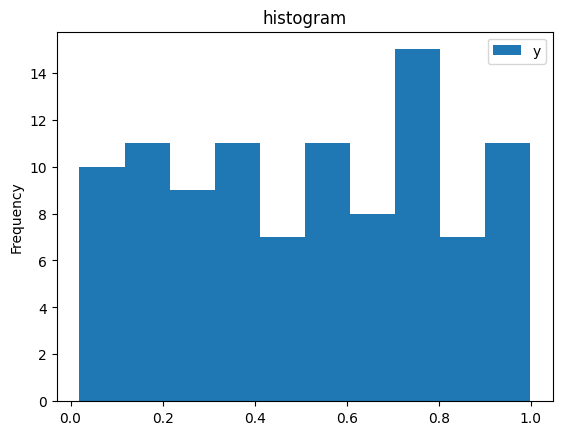

In [49]:
axes[0][0] = data.plot.scatter(x="x", y="y", title="scatter")
axes[0][1] = data.plot.hist(x="x", title="histogram")
